In [1]:
# To call this script from the command line:
# python TestOptimizerWindows.py
# To call this script from python:
# exec(open("TestOptimizerWindows.py").read(),globals())
#
import ctypes
import time
from multyxInterface import *
# Documentation for package scipy.optimize

library=ctypes.cdll.LoadLibrary("C:/Program Files/Ansol/Transmission3Dx64/multyx")
path = r'C:\Users\egrab\Desktop\T3D_test\load_1'
ses_file = 'T3D_sim.ses'
library = init_multyx_types(path, library)

interface1, seshandle1 = init_multyx_session(path, ses_file, library)
path = r'C:\Users\egrab\Desktop\T3D_spur\load_1'
ses_file = 'T3D_spur_sim.ses'
library = init_multyx_types(path, library)
interface2, seshandle2 = init_multyx_session(path, ses_file, library)


# path = r'C:\Users\egrab\Desktop\T3D_test\load_1'
# ses_file = 'T3D_sim.ses'
# interface1 = Interface(path, ses_file, library)

# path = r'C:\Users\egrab\Desktop\T3D_spur\load_1'
# ses_file = 'T3D_spur_sim.ses'
# interface2 = Interface(path, ses_file, library)




OSError: exception: access violation reading 0x0000000000000000

: 

In [3]:
print(interface1)

In [5]:
interface1.ExecuteScript(seshandle1, b'EXIT')
interface2.ExecuteScript(seshandle2, b'EDIT')

1

In [10]:
SessionHandle2=multyxlib.OpenMultyxSession(SessionFileName, InfoCallBack, ErrorCallBack, WarningCallBack)

In [12]:
print(SessionHandle)
print(SessionHandle2)
multyxlib.CloseMultyxSession(SessionHandle)
multyxlib.CloseMultyxSession(SessionHandle2)

1556116973600
1556146643008


: 

In [33]:
Output=ctypes.c_double()
retval=multyxlib.GetValueFloatingPointTaggedItem(SessionHandle,b"PATTERN_CRITICAL_VALUE",ctypes.byref(Output))
if retval==0:
    print("Failed to get output RMSDEV_CONCAVEPINION")

pres = Output.value
print(pres)

2021.9896162222


: 

In [1]:
multyxlib.CloseMultyxSession(SessionHandle)

NameError: name 'multyxlib' is not defined

In [13]:
import sys

#sys.path.insert(0,r'C:\Users\egrab\Desktop\Repositories\SpyGO\CI_3_7_0')
#print(sys.path)
import calyx
import os
import sys
import os
import ctypes

os.chdir(r'C:\Users\egrab\Desktop\T3D_spur\load_1')

configfile="calyxtmp/system.cfg"
commandfile=""
licensekeyname="Transmission3D"
nthreads=4
ci=calyx.CalyxInstance(configfile,commandfile,licensekeyname,nthreads)
print(ci.NRANGES)
print(ci.RANGENSTEPS[0])
# for irange in range(ci.NRANGES):
#   for istep in range(ci.RANGENSTEPS[irange]):
#         ci.AnalyzeOneStep()


1
15


In [15]:
del ci

NameError: name 'ci' is not defined

In [1]:
from hypoid_utils import *
from screwCalculus import *
import casadi as ca
from math import log, sqrt
import matplotlib.pyplot as plt

In [2]:
# initial tests
x = ca.SX.sym('x',3,3)
print(f"casdi variable initialized with symbol {x}, it has dimension {x.size()}")

casdi variable initialized with symbol 
[[x_0, x_3, x_6], 
 [x_1, x_4, x_7], 
 [x_2, x_5, x_8]], it has dimension (3, 3)


In [3]:
# Reynolds equation

# symbolic variables
phi = ca.SX.sym('phi')
z = ca.SX.sym('z')

# numeric values
r1 = 10    # boccola
C = 1      # gioco
r2 = r1-C  # albero



[[-2.         -1.995996   -1.99199199 ...  1.99199199  1.995996
   2.        ]
 [-2.         -1.995996   -1.99199199 ...  1.99199199  1.995996
   2.        ]
 [-2.         -1.995996   -1.99199199 ...  1.99199199  1.995996
   2.        ]
 ...
 [-2.         -1.995996   -1.99199199 ...  1.99199199  1.995996
   2.        ]
 [-2.         -1.995996   -1.99199199 ...  1.99199199  1.995996
   2.        ]
 [-2.         -1.995996   -1.99199199 ...  1.99199199  1.995996
   2.        ]]


Text(0.5, 1.0, 'Colormap of Kzz(x,y)')

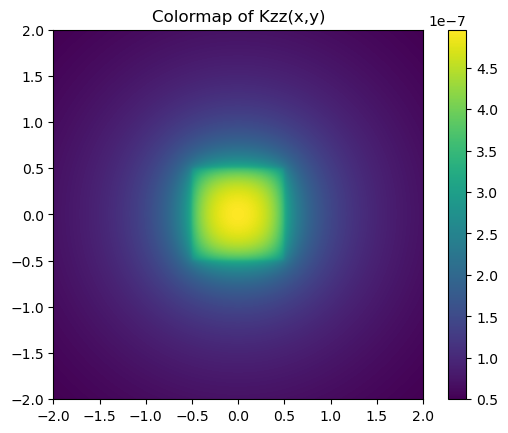

In [4]:
# Try to evaluate the solution of Bussinesq integral and find the trend w.r.t. to the distance 
ni = 0.3
E = 206000
G = E/2/(1+ni)

def Kzz(iprime, jprime, i, j, hx, hy):
    deltai=iprime-i
    deltaj=jprime-j
    k=(deltai+0.5)*hx
    m=(deltaj+0.5)*hy
    l=(deltai-0.5)*hx
    n=(deltaj-0.5)*hy

    sk2n2 = np.sqrt(k**2+n**2)
    sl2m2 = np.sqrt(l**2+m**2)
    sk2m2 = np.sqrt(k**2+m**2)
    sl2n2 = np.sqrt(l**2+n**2)

    K = (1-ni)/(2*pi*G)
    return K*(k*np.log((m+sk2m2)/(n+sk2n2))\
              +l*np.log((n+sl2n2)/(m+sl2m2))\
                +m*np.log((k+sk2m2)/(l+sl2m2))\
                    +n*np.log((l+sl2n2)/(k+sk2n2)))


t = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(t, t)
print(X)
Kzz_matrix = Kzz(0,0,t,t,0.1,0.1)
ripples = plt.imshow(Kzz(np.array([0]),np.array([0]),X,Y,np.array([0.1]),np.array([0.1])), extent=[t.min(), t.max(), t.min(), t.max()])
plt.colorbar(ripples)
plt.title('Colormap of Kzz(x,y)')

In [1]:
# Create the data.
from numpy import pi, sin, cos, mgrid
dphi, dtheta = pi/250.0, pi/250.0
[phi,theta] = mgrid[0:pi+dphi*1.5:dphi,0:2*pi+dtheta*1.5:dtheta]
m0 = 4; m1 = 3; m2 = 2; m3 = 3; m4 = 6; m5 = 2; m6 = 6; m7 = 4;
r = sin(m0*phi)**m1 + cos(m2*phi)**m3 + sin(m4*theta)**m5 + cos(m6*theta)**m7
x = r*sin(phi)*cos(theta)
y = r*cos(phi)
z = r*sin(phi)*sin(theta)

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z)
mlab.show()

In [2]:
import numpy as np
from mayavi import mlab
# Produce some nice data.
n_mer, n_long = 6, 11
pi = np.pi
dphi = pi/1000.0
phi = np.arange(0.0, 2*pi + 0.5*dphi, dphi, 'd')
mu = phi*n_mer
x = np.cos(mu)*(1+np.cos(n_long*mu/n_mer)*0.5)
y = np.sin(mu)*(1+np.cos(n_long*mu/n_mer)*0.5)
z = np.sin(n_long*mu/n_mer)*0.5

# View it.
l = mlab.plot3d(x, y, z, np.sin(mu), tube_radius=0.025, colormap='Spectral')

# Now animate the data.
ms = l.mlab_source
for i in range(10):
    x = np.cos(mu)*(1+np.cos(n_long*mu/n_mer +
                                      np.pi*(i+1)/5.)*0.5)
    scalars = np.sin(mu + np.pi*(i+1)/5)
    ms.trait_set(x=x, scalars=scalars)

: 

In [2]:
import numpy as np
from mayavi import mlab
x, y = np.mgrid[0:3:1,0:3:1]
s = mlab.surf(x, y, np.asarray(x*0.1, 'd'))

@mlab.animate
def anim():
    while True:
        for i in range(10):
            s.mlab_source.scalars = np.asarray(x*0.1*(i+1), 'd')
            yield

anim()

 

In [2]:
import numpy as np
from mayavi import mlab

def test_mesh():
    """A very pretty picture of spherical harmonics translated from
    the octaviz example."""
    pi = np.pi
    cos = np.cos
    sin = np.sin
    dphi, dtheta = pi / 250.0, pi / 250.0
    [phi, theta] = np.mgrid[0:pi + dphi * 1.5:dphi,
                            0:2 * pi + dtheta * 1.5:dtheta]
    m0 = 4
    m1 = 3
    m2 = 2
    m3 = 3
    m4 = 6
    m5 = 2
    m6 = 6
    m7 = 4
    r = sin(m0 * phi) ** m1 + cos(m2 * phi) ** m3 + \
        sin(m4 * theta) ** m5 + cos(m6 * theta) ** m7
    x = r * sin(phi) * cos(theta)
    y = r * cos(phi)
    z = r * sin(phi) * sin(theta)

    return mesh(x, y, z, colormap="bone")

test_mesh()
mlab.show()

NameError: name 'mlab' is not defined